In [75]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout, Bidirectional
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers.merge import Concatenate
import matplotlib.gridspec as gridspec

In [64]:
#https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

url = "nflx.csv"

df = pd.read_csv(url)

df.columns = [x.lower() for x in df.columns]
#print(df.head())
df=df.sort_values(by="date")

df=df.drop(["high","low","adj close"],axis=1)
print(df.columns)

df['open_pct_change']=df['open'].pct_change()

print(df["open_pct_change"])

df["open_pct_pos_count"]=0

#######caculate the occurrences of positive open
for index in range(len(df)):
    #print(df.iloc[index])
    count=0
    for index2 in (range(index,0,-1)):
        #print(df.iloc[index2]["open_pct_change"])
        if df.iloc[index2]["open_pct_change"]>0:
            count=count+1
            #print("found",count)
        else:
            break
    #print("count",count)
    df.iloc[index, df.columns.get_loc('open_pct_pos_count')]=count
    #print("new",df.iloc[index]["pct_pos_count"])
    
print(df[df["open_pct_pos_count"]>0])    
    #data.iloc[::-1]
    


    


#creditcard.rename(columns = {'class': 'fraud'}, inplace = True)
#print(creditcard.fraud.value_counts(dropna = False))



#X_train=np.array(X_train).reshape(1,timeSteps,1)
#y_train=np.array(y_train).reshape(1,timeSteps,1)


Index(['date', 'open', 'close', 'volume'], dtype='object')
0           NaN
1     -0.006340
2     -0.011432
3      0.013989
4     -0.004157
         ...   
249   -0.030376
250    0.007296
251   -0.022621
252   -0.016627
253   -0.051331
Name: open_pct_change, Length: 254, dtype: float64
           date        open       close   volume  open_pct_change  \
3    2019-10-24  271.809998  271.500000  4827400         0.013989   
5    2019-10-28  278.049988  281.859985  6248400         0.027228   
6    2019-10-29  281.869995  281.209991  4356200         0.013739   
7    2019-10-30  284.339996  291.450012  9345600         0.008763   
8    2019-10-31  291.000000  287.410004  5090000         0.023423   
..          ...         ...         ...      ...              ...   
244  2020-10-08  533.479980  531.789978  5386500         0.029884   
245  2020-10-09  537.830017  539.440002  4781300         0.008154   
246  2020-10-12  548.809998  539.809998  5391100         0.020415   
248  2020-10-14  562.609

In [65]:
####### if the occurrences were greater than 2, did the pct change stay positive

df["target"]=0
for index in range(len(df)):
    pct_chg=df.iloc[index]["open_pct_change"]
    if index!=0:
        prior_pct_chg_count=df.iloc[index-1]["open_pct_pos_count"]
        if (prior_pct_chg_count>=2) & (pct_chg>0):
             df.iloc[index, df.columns.get_loc('target')]=1
        
buy_list=df[df["target"]==1]
for index,item in buy_list.iterrows():
    print(item["date"],item["open"],item["open_pct_pos_count"])

2019-10-30 284.339996 3
2019-10-31 291.0 4
2019-11-19 304.01001 3
2019-12-16 300.850006 3
2019-12-17 307.359985 4
2019-12-18 316.26001 5
2019-12-19 324.5 6
2019-12-20 335.0 7
2019-12-23 337.76001 8
2020-03-23 347.890015 3
2020-03-24 369.98999 4
2020-03-31 367.929993 3
2020-04-01 376.049988 4
2020-04-15 413.0 3
2020-04-16 437.0 4
2020-05-04 417.77999900000003 3
2020-05-05 427.55999800000006 4
2020-05-06 429.299988 5
2020-05-07 436.89001500000006 6
2020-05-20 454.25 3
2020-06-01 418.829987 3
2020-06-02 425.869995 4
2020-06-03 426.950012 5
2020-06-10 436.0 3
2020-06-18 448.73001100000005 3
2020-06-19 449.119995 4
2020-06-22 455.01000999999997 5
2020-06-23 466.5 6
2020-06-24 468.540009 7
2020-07-02 485.64001500000006 3
2020-07-09 508.39999400000005 3
2020-07-10 519.72998 4
2020-07-13 567.97998 5
2020-08-04 498.64999400000005 3
2020-08-05 508.67999299999997 4
2020-08-17 484.19000199999994 3
2020-08-18 484.35000599999995 4
2020-08-19 493.92999299999997 5
2020-09-29 489.5 3
2020-09-30 492.570

In [138]:
#X = df.drop(["date","target"], axis = 1)
#y = df["target"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, stratify = y, random_state = 42)
timeSteps=30
#X_train = np.resize(X_train,(X_train.shape[0],timeSteps,X_train.shape[1]))


train_split= 0.9
split_idx = int(len(X) * 0.9)
training_set = df[:split_idx].values
test_set = df[split_idx:].values


n_future=5
n_past=30


X_train , y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0] , X_train.shape[1], 1))

pct_chg_column=4
X_test = test_set[: n_past, pct_chg_column]
#print(X_test)

target_column=6
#n_past : n_past + n_future
print(n_past + n_future)
y_test = test_set[n_past + n_future, target_column]
print(y_test)

#convert to an array
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (1, X_test.shape[0], 1))



samples=X_train.shape[0]

features=len(X.columns)

35


IndexError: index 35 is out of bounds for axis 0 with size 26

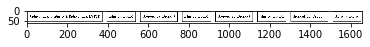

In [105]:
#1. The LSTM input layer must be 3D.
#2. The meaning of the 3 input dimensions are: samples, time steps, and features.
#3. The LSTM input layer is defined by the input_shape argument on the first hidden layer.
#4. The input_shape argument takes a tuple of two values that define the number of time steps and features.
#5. The number of samples is assumed to be 1 or more.

#Samples. One sequence is one sample. A batch is comprised of one or more samples.
#Time Steps. One time step is one point of observation in the sample.
#Features. One feature is one observation at a time step.

#input layer expects a 3D array of data when fitting the model and when making predictions, 
#even if specific dimensions of the array contain a single value, e.g. one sample or one feature.

#The input shape is supposed in the format (no_of_samples,no_of_timesteps,features)

#The input to every LSTM layer must be three-dimensional.
# expected input data shape: (batch_size, timesteps, data_dim)

n_future = 1
model = Sequential()

model.add(Bidirectional(LSTM(units=30, return_sequences=True, 
                             input_shape=(timeSteps, features))))

#old -- model.add(LSTM(30, activation='sigmoid', return_sequences=True,
#              input_shape=(timeSteps, features)))  # returns a sequence of vectors of dimension 

#model.add(LSTM(features, activation='sigmoid', return_sequences=True))  # returns a sequence of vectors of dimension 
#model.add(LSTM(30, activation='sigmoid'))  # return a single vector of dimension 
#model.add(Dense(1, activation='sigmoid'))
#model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

model.add(LSTM(units= features, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= features, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units= features))
model.add(Dropout(0.2))
model.add(Dense(units = n_future, activation="relu"))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["acc"])



plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()



In [106]:
model.fit(X_train, np.array(y_train),epochs=500, batch_size=32  )

Epoch 1/500
170/170 [==============================] - 2s 9ms/step - loss: nan - acc: 0.1176
Epoch 2/500
170/170 [==============================] - 0s 701us/step - loss: nan - acc: 0.0000e+00
Epoch 3/500
170/170 [==============================] - 0s 696us/step - loss: nan - acc: 0.0000e+00
Epoch 4/500
170/170 [==============================] - 0s 628us/step - loss: nan - acc: 0.0000e+00
Epoch 5/500
170/170 [==============================] - 0s 764us/step - loss: nan - acc: 0.0000e+00
Epoch 6/500
170/170 [==============================] - 0s 672us/step - loss: nan - acc: 0.0000e+00
Epoch 7/500
170/170 [==============================] - 0s 607us/step - loss: nan - acc: 0.0000e+00
Epoch 8/500
170/170 [==============================] - 0s 698us/step - loss: nan - acc: 0.0000e+00
Epoch 9/500
170/170 [==============================] - 0s 815us/step - loss: nan - acc: 0.0000e+00
Epoch 10/500
170/170 [==============================] - 0s 786us/step - loss: nan - acc: 0.0000e+00
Epoch 11/500
17

170/170 [==============================] - 0s 830us/step - loss: nan - acc: 0.0000e+00
Epoch 83/500
170/170 [==============================] - 0s 860us/step - loss: nan - acc: 0.0000e+00
Epoch 84/500
170/170 [==============================] - 0s 760us/step - loss: nan - acc: 0.0000e+00
Epoch 85/500
170/170 [==============================] - 0s 799us/step - loss: nan - acc: 0.0000e+00
Epoch 86/500
170/170 [==============================] - 0s 704us/step - loss: nan - acc: 0.0000e+00
Epoch 87/500
170/170 [==============================] - 0s 785us/step - loss: nan - acc: 0.0000e+00
Epoch 88/500
170/170 [==============================] - 0s 742us/step - loss: nan - acc: 0.0000e+00
Epoch 89/500
170/170 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 90/500
170/170 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 91/500
170/170 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 92/500
170/17

170/170 [==============================] - 0s 716us/step - loss: nan - acc: 0.0000e+00
Epoch 164/500
170/170 [==============================] - 0s 969us/step - loss: nan - acc: 0.0000e+00
Epoch 165/500
170/170 [==============================] - 0s 829us/step - loss: nan - acc: 0.0000e+00
Epoch 166/500
170/170 [==============================] - 0s 866us/step - loss: nan - acc: 0.0000e+00
Epoch 167/500
170/170 [==============================] - 0s 719us/step - loss: nan - acc: 0.0000e+00
Epoch 168/500
170/170 [==============================] - 0s 719us/step - loss: nan - acc: 0.0000e+00
Epoch 169/500
170/170 [==============================] - 0s 629us/step - loss: nan - acc: 0.0000e+00
Epoch 170/500
170/170 [==============================] - 0s 701us/step - loss: nan - acc: 0.0000e+00
Epoch 171/500
170/170 [==============================] - 0s 719us/step - loss: nan - acc: 0.0000e+00
Epoch 172/500
170/170 [==============================] - 0s 698us/step - loss: nan - acc: 0.0000e+00
Epoc

170/170 [==============================] - 0s 696us/step - loss: nan - acc: 0.0000e+00
Epoch 244/500
170/170 [==============================] - 0s 722us/step - loss: nan - acc: 0.0000e+00
Epoch 245/500
170/170 [==============================] - 0s 674us/step - loss: nan - acc: 0.0000e+00
Epoch 246/500
170/170 [==============================] - 0s 723us/step - loss: nan - acc: 0.0000e+00
Epoch 247/500
170/170 [==============================] - 0s 673us/step - loss: nan - acc: 0.0000e+00
Epoch 248/500
170/170 [==============================] - 0s 699us/step - loss: nan - acc: 0.0000e+00
Epoch 249/500
170/170 [==============================] - 0s 751us/step - loss: nan - acc: 0.0000e+00
Epoch 250/500
170/170 [==============================] - 0s 584us/step - loss: nan - acc: 0.0000e+00
Epoch 251/500
170/170 [==============================] - 0s 787us/step - loss: nan - acc: 0.0000e+00
Epoch 252/500
170/170 [==============================] - 0s 625us/step - loss: nan - acc: 0.0000e+00
Epoc

170/170 [==============================] - 0s 654us/step - loss: nan - acc: 0.0000e+00
Epoch 324/500
170/170 [==============================] - 0s 696us/step - loss: nan - acc: 0.0000e+00
Epoch 325/500
170/170 [==============================] - 0s 625us/step - loss: nan - acc: 0.0000e+00
Epoch 326/500
170/170 [==============================] - 0s 716us/step - loss: nan - acc: 0.0000e+00
Epoch 327/500
170/170 [==============================] - 0s 604us/step - loss: nan - acc: 0.0000e+00
Epoch 328/500
170/170 [==============================] - 0s 724us/step - loss: nan - acc: 0.0000e+00
Epoch 329/500
170/170 [==============================] - 0s 742us/step - loss: nan - acc: 0.0000e+00
Epoch 330/500
170/170 [==============================] - 0s 675us/step - loss: nan - acc: 0.0000e+00
Epoch 331/500
170/170 [==============================] - 0s 791us/step - loss: nan - acc: 0.0000e+00
Epoch 332/500
170/170 [==============================] - 0s 648us/step - loss: nan - acc: 0.0000e+00
Epoc

170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 405/500
170/170 [==============================] - 0s 643us/step - loss: nan - acc: 0.0000e+00
Epoch 406/500
170/170 [==============================] - 0s 644us/step - loss: nan - acc: 0.0000e+00
Epoch 407/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 408/500
170/170 [==============================] - 0s 644us/step - loss: nan - acc: 0.0000e+00
Epoch 409/500
170/170 [==============================] - 0s 643us/step - loss: nan - acc: 0.0000e+00
Epoch 410/500
170/170 [==============================] - 0s 643us/step - loss: nan - acc: 0.0000e+00
Epoch 411/500
170/170 [==============================] - 0s 643us/step - loss: nan - acc: 0.0000e+00
Epoch 412/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 413/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoc

170/170 [==============================] - 0s 827us/step - loss: nan - acc: 0.0000e+00
Epoch 486/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 487/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 488/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 489/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 490/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 491/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 492/500
170/170 [==============================] - 0s 643us/step - loss: nan - acc: 0.0000e+00
Epoch 493/500
170/170 [==============================] - 0s 735us/step - loss: nan - acc: 0.0000e+00
Epoch 494/500
170/170 [==============================] - 0s 863us/step - loss: nan - acc: 0.0000e+00
Epoc

In [108]:
prediction = model.predict(X_test)
print('Predicted {}'.format(prediction))
print('Real {}'.format(y_test))

ValueError: Error when checking input: expected sequential_12_input to have 3 dimensions, but got array with shape (84, 5)